In [1]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap8
Added /Users/jinceyang/Desktop/codebase/ml/learn_d2l to Python path


In [2]:
import importlib
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import numpy as np

import importlib
from d2l.classification.model import ResNetClassifier, ResNeXtClassifier
from d2l.classification.dataset import FashionMNISTDataset
from d2l.base.trainer import Trainer
from d2l.base.evaluator import ClassificationEvaluator
from d2l.base.optimizer import SGDOptimizer
from d2l.base.plot import plot_loss, show_images, plot_losses
from d2l.base.utils import mps
from typing import List
from matplotlib import pyplot as plt
import torch
import numpy as np

from d2l.base.function import corr2d, corr2d_multi_in, corr2d_multi_in_out, corr2d_multi_in_out_1x1, comp_conv2d, max_pool2d, avg_pool2d

In [3]:
rng = torch.Generator().manual_seed(42)

In [4]:
data = FashionMNISTDataset()
train_data_loader = data.get_train_dataloader(batch_size=10)
train_iter = iter(train_data_loader)
X, y = next(train_iter)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: torch.Size([10, 1, 28, 28])
y shape: torch.Size([10])


In [5]:
resnet = ResNetClassifier(
    num_outputs=10,
    rng=rng
)

resnet.init((10, 1, 28, 28))
resnet.layer_summary((10, 1, 28, 28))

              Conv2d  input shape: torch.Size([10, 1, 28, 28])
              Conv2d  output shape: torch.Size([10, 32, 14, 14])
         BatchNorm2d  input shape: torch.Size([10, 32, 14, 14])
         BatchNorm2d  output shape: torch.Size([10, 32, 14, 14])
                ReLU  input shape: torch.Size([10, 32, 14, 14])
                ReLU  output shape: torch.Size([10, 32, 14, 14])
           MaxPool2d  input shape: torch.Size([10, 32, 14, 14])
           MaxPool2d  output shape: torch.Size([10, 32, 7, 7])
       ResidualBlock  input shape: torch.Size([10, 32, 7, 7])
       ResidualBlock  output shape: torch.Size([10, 32, 7, 7])
       ResidualBlock  input shape: torch.Size([10, 32, 7, 7])
       ResidualBlock  output shape: torch.Size([10, 64, 4, 4])
       ResidualBlock  input shape: torch.Size([10, 64, 4, 4])
       ResidualBlock  output shape: torch.Size([10, 128, 2, 2])
       ResidualBlock  input shape: torch.Size([10, 128, 2, 2])
       ResidualBlock  output shape: torch.Size([

In [6]:
resneXt = ResNeXtClassifier(
    num_outputs=10,
    rng=rng
)
resneXt.init((10, 1, 28, 28))
resneXt.layer_summary((10, 1, 28, 28))

              Conv2d  input shape: torch.Size([10, 1, 28, 28])
              Conv2d  output shape: torch.Size([10, 32, 14, 14])
         BatchNorm2d  input shape: torch.Size([10, 32, 14, 14])
         BatchNorm2d  output shape: torch.Size([10, 32, 14, 14])
                ReLU  input shape: torch.Size([10, 32, 14, 14])
                ReLU  output shape: torch.Size([10, 32, 14, 14])
           MaxPool2d  input shape: torch.Size([10, 32, 14, 14])
           MaxPool2d  output shape: torch.Size([10, 32, 7, 7])
      ResidualXBlock  input shape: torch.Size([10, 32, 7, 7])
      ResidualXBlock  output shape: torch.Size([10, 32, 7, 7])
      ResidualXBlock  input shape: torch.Size([10, 32, 7, 7])
      ResidualXBlock  output shape: torch.Size([10, 64, 4, 4])
      ResidualXBlock  input shape: torch.Size([10, 64, 4, 4])
      ResidualXBlock  output shape: torch.Size([10, 128, 2, 2])
      ResidualXBlock  input shape: torch.Size([10, 128, 2, 2])
      ResidualXBlock  output shape: torch.Size([

In [7]:
def eval_on_epoch(model, epoch_id, batch_losses):
    evaluator = ClassificationEvaluator(model)
    loss = evaluator.loss(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation loss {loss:.4f}')
    accuracy = evaluator.accuracy(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation accuracy {accuracy:.4f}')

In [8]:
trainer = Trainer(
    model=resnet, 
    optimizer=torch.optim.Adam(resnet.net.parameters(), lr=0.005),
    on_train_epoch_end=eval_on_epoch
)
trainer_resxnet = Trainer(
    model=resneXt, 
    optimizer=torch.optim.Adam(resneXt.net.parameters(), lr=0.005),
    on_train_epoch_end=eval_on_epoch
)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 0, validation loss 0.3749
Epoch 0, validation accuracy 0.8659


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 1, validation loss 0.3268
Epoch 1, validation accuracy 0.8774


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 2, validation loss 0.2905
Epoch 2, validation accuracy 0.8942


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 3, validation loss 0.3029
Epoch 3, validation accuracy 0.8896


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 4, validation loss 0.2935
Epoch 4, validation accuracy 0.8938


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 5, validation loss 0.3083
Epoch 5, validation accuracy 0.8906


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 6, validation loss 0.2731
Epoch 6, validation accuracy 0.9025


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 7, validation loss 0.2819
Epoch 7, validation accuracy 0.8984


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 8, validation loss 0.2597
Epoch 8, validation accuracy 0.9091


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 9, validation loss 0.2672
Epoch 9, validation accuracy 0.9070


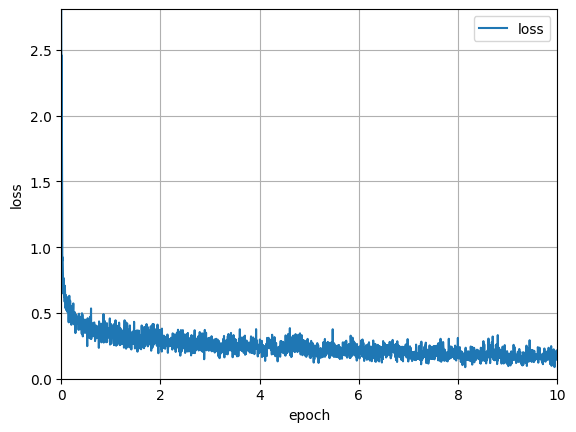

In [9]:
epoch_losses = trainer.train(
    data.get_train_dataloader_epochs(batch_size=256, num_epochs=10)
)
fig, ax = plt.subplots()
plot_loss(ax, epoch_losses)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 0, validation loss 0.3838
Epoch 0, validation accuracy 0.8551


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 1, validation loss 0.3609
Epoch 1, validation accuracy 0.8599


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 2, validation loss 0.2957
Epoch 2, validation accuracy 0.8921


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 3, validation loss 0.3279
Epoch 3, validation accuracy 0.8800


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 4, validation loss 0.2849
Epoch 4, validation accuracy 0.8944


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 5, validation loss 0.2939
Epoch 5, validation accuracy 0.8893


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 6, validation loss 0.2950
Epoch 6, validation accuracy 0.8949


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 7, validation loss 0.2744
Epoch 7, validation accuracy 0.9020


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 8, validation loss 0.2683
Epoch 8, validation accuracy 0.9051


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 9, validation loss 0.2821
Epoch 9, validation accuracy 0.9022


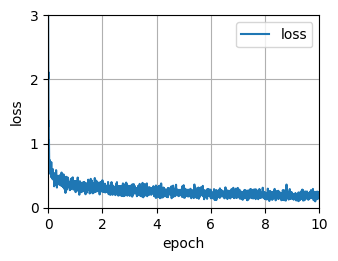

In [10]:
epoch_losses = trainer_resxnet.train(
    data.get_train_dataloader_epochs(batch_size=256, num_epochs=10)
)
fig, ax = plt.subplots()
plot_loss(ax, epoch_losses)

In [11]:
evaluator = ClassificationEvaluator(resnet)
test_loss = evaluator.loss(data.get_test_dataloader(data.test_size))
print(f'Test loss: {test_loss:.4f}')
accuracy = evaluator.accuracy(data.get_test_dataloader(data.test_size))
print(f'Test accuracy: {accuracy:.2%}')

Test loss: 0.2672
Test accuracy: 90.70%


In [12]:
evaluator = ClassificationEvaluator(resneXt)
test_loss = evaluator.loss(data.get_test_dataloader(data.test_size))
print(f'Test loss (bn) : {test_loss:.4f}')
accuracy = evaluator.accuracy(data.get_test_dataloader(data.test_size))
print(f'Test accuracy (bn): {accuracy:.2%}')

Test loss (bn) : 0.2821
Test accuracy (bn): 90.22%


In [13]:
# save the models
resnet.save('resnet.pth')
resneXt.save('resneXt.pth')